In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from datetime import datetime
from glob import glob
from collections import defaultdict

from lib import Simulation
from lib import Consensus
from lib import Stat
from lib import Log

In [3]:
consensus = Consensus.read('../data/2021-01-01-00-00-00/cached-microdesc-consensus')
consensus.df

Nickname   Version   Fast  Authority  \
ID                                                                            
AAbeLnfjw+xeGCWwduUlf9IA7Qo           flageolet   0.4.2.7   True      False   
AAoQ1DAR6kkoo19hBAX5K0QztNw               seele   0.4.4.6  False      False   
ABG9JIWtRdmE7EFZyI/AZuXjMA4    CalyxInstitute14   0.4.2.7   True      False   
ABLiyQZzB7zWByF5wzs1Zl7MiCg        220VoltLive2   0.4.2.7   True      False   
AB0j2MCqPNmv7lDt9wrfcRzVCHA                 SN2   0.4.4.6  False      False   
...                                         ...       ...    ...        ...   
/7xpRns31qxmWYu9KV+bDXQRmtw           plan9leia  0.3.5.12   True      False   
/9wsw5XLIUtzZQLvQAgnhGEVnWY  CypherpunkLabsExit   0.4.3.6   True      False   
//ZRqdVsTOlLbMDHwxwl5agNaQY             Unnamed   0.4.4.5   True      False   
//eMRLpua291JQlbvhTvfL64l0Q             ddetor2  0.3.5.12   True      False   
//v7UKg6QUzCG0zak6lnSwBHBeg       nestor00patof   0.4.3.6   True      False   

                             Guard  Middle   Exit  V2Dir  Stable  HSDir  ...  \
ID                                                                       ...   
AAbeLnfjw+xeGCWwduUlf9IA7Qo   True   False  False   True    True   True  ...   
AAoQ1DAR6kkoo19hBAX5K0QztNw  False    True  False   True    True  False  ...   
ABG9JIWtRdmE7EFZyI/AZuXjMA4   True   False   True   True    True   True  ...   
ABLiyQZzB7zWByF5wzs1Zl7MiCg  False    True  False   True    True  False  ...   
AB0j2MCqPNmv7lDt9wrfcRzVCHA  False    True  False   True   False  False  ...   
...                            ...     ...    ...    ...     ...    ...  ...   
/7xpRns31qxmWYu9KV+bDXQRmtw  False    True  False   True    True   True  ...   
/9wsw5XLIUtzZQLvQAgnhGEVnWY   True   False   True   True    True   True  ...   
//ZRqdVsTOlLbMDHwxwl5agNaQY  False    True  False   True    True   True  ...   
//eMRLpua291JQlbvhTvfL64l0Q  False    True  False   True    True   True  ...   
//v7UKg6QUzCG0zak6lnSwBHBeg  False    True  False   True    True   True  ...   

                             Running  Valid  Bandwidth  Unmeasured  \
ID                                                                   
AAbeLnfjw+xeGCWwduUlf9IA7Qo     True   True       1510       False   
AAoQ1DAR6kkoo19hBAX5K0QztNw     True   True          7       False   
ABG9JIWtRdmE7EFZyI/AZuXjMA4     True   True      13200       False   
ABLiyQZzB7zWByF5wzs1Zl7MiCg     True   True         89       False   
AB0j2MCqPNmv7lDt9wrfcRzVCHA     True   True          0        True   
...                              ...    ...        ...         ...   
/7xpRns31qxmWYu9KV+bDXQRmtw     True   True        781       False   
/9wsw5XLIUtzZQLvQAgnhGEVnWY     True   True      11300       False   
//ZRqdVsTOlLbMDHwxwl5agNaQY     True   True      21000       False   
//eMRLpua291JQlbvhTvfL64l0Q     True   True       1720       False   
//v7UKg6QUzCG0zak6lnSwBHBeg     True   True         43       False   

                             WeightForGuard  WeightForMiddle  WeightForExit  \
ID                                                                            
AAbeLnfjw+xeGCWwduUlf9IA7Qo         902.376          607.624            0.0   
AAoQ1DAR6kkoo19hBAX5K0QztNw           0.000            7.000            0.0   
ABG9JIWtRdmE7EFZyI/AZuXjMA4           0.000            0.000        13200.0   
ABLiyQZzB7zWByF5wzs1Zl7MiCg           0.000           89.000            0.0   
AB0j2MCqPNmv7lDt9wrfcRzVCHA           0.000            0.000            0.0   
...                                     ...              ...            ...   
/7xpRns31qxmWYu9KV+bDXQRmtw           0.000          781.000            0.0   
/9wsw5XLIUtzZQLvQAgnhGEVnWY           0.000            0.000        11300.0   
//ZRqdVsTOlLbMDHwxwl5agNaQY           0.000        21000.000            0.0   
//eMRLpua291JQlbvhTvfL64l0Q           0.000         1720.000            0.0   
//v7UKg6QUzCG0zak6lnSwBHBeg           0.000           43.000            0.0   

                             Pr

In [4]:
df = consensus.df
print(df[df['ProbForGuard']>0.0].count()['Guard'])
print(df[df['ProbForMiddle']>0.0].count()['Middle'])
print(df[df['ProbForExit']>0.0].count()['Exit'])

2609
5252
1548


In [5]:
df = consensus.df
print(df[df['Guard']].count()['Guard'])
print(df[df['Middle']].count()['Middle'])
print(df[df['Exit']].count()['Exit'])

3735
2667
1553


In [6]:
print(df[df['Guard'] & df['ProbForGuard']>0.0].count()['Guard'])
print(df[df['Guard'] & df['ProbForMiddle']>0.0].count()['Guard'])
print(df[df['Guard'] & df['ProbForExit']>0.0].count()['Guard'])

2609
2609
1126


In [7]:
print(df[df['Middle'] & df['ProbForGuard']>0.0].count()['Middle'])
print(df[df['Middle'] & df['ProbForMiddle']>0.0].count()['Middle'])
print(df[df['Middle'] & df['ProbForExit']>0.0].count()['Middle'])

0
2643
0


In [8]:
print(df[df['Exit'] & df['ProbForGuard']>0.0].count()['Exit'])
print(df[df['Exit'] & df['ProbForMiddle']>0.0].count()['Exit'])
print(df[df['Exit'] & df['ProbForExit']>0.0].count()['Exit'])

0
0
1548


In [9]:
5252-2667

2585

In [10]:
pd.options.display.float_format = '{:.5f}'.format
percentiles=[0.25,0.5,0.75,0.95,0.96,0.97,0.98,0.99]
pd.DataFrame({
    'Guards': df[df['Guard'] & df['ProbForMiddle']>0.0].describe(percentiles)['ProbForMiddle'],
    'Middles': df[df['Middle'] & df['ProbForMiddle']>0.0].describe(percentiles)['ProbForMiddle']
})

Guards    Middles
count 2609.00000 2643.00000
mean     0.00026    0.00012
std      0.00032    0.00036
min      0.00001    0.00000
25%      0.00006    0.00001
50%      0.00015    0.00002
75%      0.00030    0.00006
95%      0.00096    0.00062
96%      0.00106    0.00071
97%      0.00116    0.00084
98%      0.00131    0.00113
99%      0.00153    0.00181
max      0.00295    0.00546

In [11]:
def calculate_stat_outgoing_links(links):
    count_outgoing_links = defaultdict(int)
    for start, end in set(links.keys()):
        count_outgoing_links[start] += 1

    shared_outgoing_links = defaultdict(int)
    for (start, end), count in links.items():
        if count > 2:
            shared_outgoing_links[start] += 1

    stat_outgoing_links = defaultdict(list)
    for relay, links in count_outgoing_links.items():
        stat_outgoing_links['Relay'].append(relay)
        stat_outgoing_links['Bandwidth'].append(consensus.df.loc[relay]['Bandwidth'])
        stat_outgoing_links['ProbForMiddle'].append(consensus.df.loc[relay]['ProbForMiddle'])
        stat_outgoing_links['Links'].append(links)    
        stat_outgoing_links['Shared Links'].append(shared_outgoing_links[relay])   

        if consensus.df.loc[relay]['Guard']:
            stat_outgoing_links['Type'].append('Guard-Flag')    
        elif consensus.df.loc[relay]['Middle']:
            stat_outgoing_links['Type'].append('Middle-Flag')    
        elif consensus.df.loc[relay]['Exit']:
            stat_outgoing_links['Type'].append('Exit-Flag')    

    return pd.DataFrame(stat_outgoing_links)

In [12]:
consensus = Consensus.read('../data/2021-01-01-00-00-00/cached-microdesc-consensus')
sim = Simulation.from_consensus(consensus, N=1_000_000, is_internal=False).simulate()
stat_outgoing_links = calculate_stat_outgoing_links(sim.stat.links)

fig, axes = plt.subplots(1, 2, figsize=(16, 9))
axes[0].grid()
axes[1].grid()
sns.scatterplot(data=stat_outgoing_links, x='Bandwidth', y='Links', hue='Type' , alpha=0.2, ax=axes[0])
sns.scatterplot(data=stat_outgoing_links, x='Bandwidth', y='Shared Links', hue='Type', alpha=0.2, ax=axes[1])
fig.suptitle('1M active circuits per second (consensus 2021-01-01)')
plt.show()

In [13]:
consensus = Consensus.read('../data/2021-01-01-00-00-00/cached-microdesc-consensus')
sim = Simulation.from_consensus(consensus, N=5_000_000, is_internal=False).simulate()
stat_outgoing_links = calculate_stat_outgoing_links(sim.stat.links)

fig, axes = plt.subplots(1, 2, figsize=(16, 9))
axes[0].grid()
axes[1].grid()
sns.scatterplot(data=stat_outgoing_links, x='Bandwidth', y='Links', hue='Type' , alpha=0.2, ax=axes[0])
sns.scatterplot(data=stat_outgoing_links, x='Bandwidth', y='Shared Links', hue='Type', alpha=0.2, ax=axes[1])
fig.suptitle('5M active circuits per second (consensus 2021-01-01)')
plt.show()

In [14]:
sim = Simulation.from_consensus(consensus, N=950_000, is_internal=False).simulate()
stat_outgoing_links = calculate_stat_outgoing_links(sim.stat.guard_middles)

fig, axes = plt.subplots(1, 2, figsize=(16, 9))
axes[0].grid()
axes[1].grid()
sns.scatterplot(data=stat_outgoing_links, x='Bandwidth', y='Links', hue='Type' , alpha=0.2, ax=axes[0])
sns.scatterplot(data=stat_outgoing_links, x='Bandwidth', y='Shared Links', hue='Type', alpha=0.2, ax=axes[1])
plt.show()

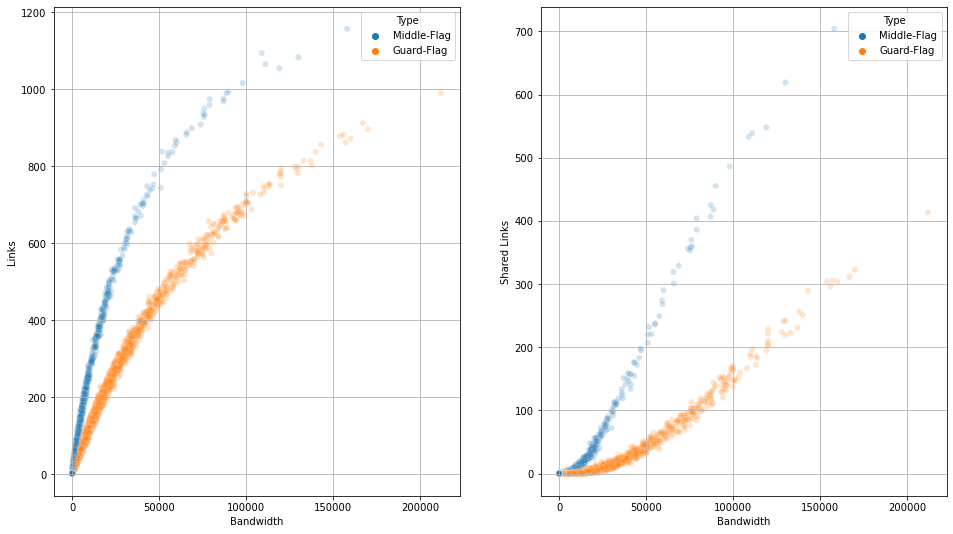

In [15]:
sim = Simulation.from_consensus(consensus, N=950_000, is_internal=False).simulate()
stat_outgoing_links = calculate_stat_outgoing_links(sim.stat.middle_exits)

fig, axes = plt.subplots(1, 2, figsize=(16, 9))
axes[0].grid()
axes[1].grid()
sns.scatterplot(data=stat_outgoing_links, x='Bandwidth', y='Links', hue='Type' , alpha=0.2, ax=axes[0])
sns.scatterplot(data=stat_outgoing_links, x='Bandwidth', y='Shared Links', hue='Type', alpha=0.2, ax=axes[1])
plt.show()

In [16]:
log = Log.read('../data/2021-01-01-00-00-00/log')
stat_outgoing_links = calculate_stat_outgoing_links(log.stat.links)

fig, axes = plt.subplots(1, 2, figsize=(16, 9))
axes[0].grid()
axes[1].grid()
sns.scatterplot(data=stat_outgoing_links, x='Bandwidth', y='Links', hue='Type' , alpha=0.2, ax=axes[0])
sns.scatterplot(data=stat_outgoing_links, x='Bandwidth', y='Shared Links', hue='Type', alpha=0.2, ax=axes[1])
plt.show()

In [17]:
stat_outgoing_links = calculate_stat_outgoing_links(log.stat.middle_exits)

fig, axes = plt.subplots(1, 2, figsize=(16, 9))
axes[0].grid()
axes[1].grid()
sns.scatterplot(data=stat_outgoing_links, x='Bandwidth', y='Links', hue='Type' , alpha=0.2, ax=axes[0])
sns.scatterplot(data=stat_outgoing_links, x='Bandwidth', y='Shared Links', hue='Type', alpha=0.2, ax=axes[1])
plt.show()

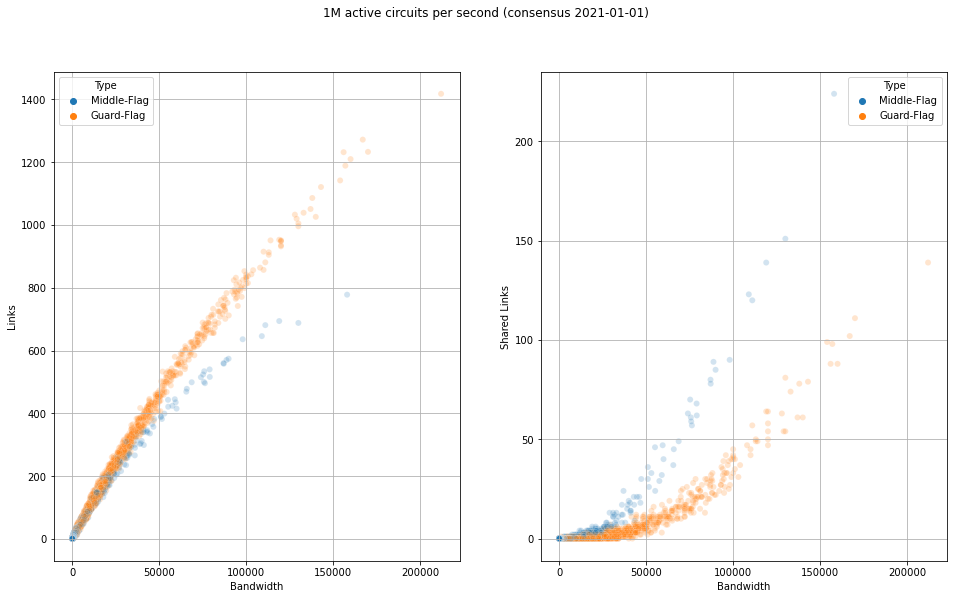

In [18]:
consensus = Consensus.read('../data/2021-01-01-00-00-00/cached-microdesc-consensus')
sim = Simulation.from_consensus(consensus, N=300_000, is_internal=False).simulate()
stat_outgoing_links = calculate_stat_outgoing_links(sim.stat.links)

fig, axes = plt.subplots(1, 2, figsize=(16, 9))
axes[0].grid()
axes[1].grid()
sns.scatterplot(data=stat_outgoing_links, x='Bandwidth', y='Links', hue='Type' , alpha=0.2, ax=axes[0])
sns.scatterplot(data=stat_outgoing_links, x='Bandwidth', y='Shared Links', hue='Type', alpha=0.2, ax=axes[1])
fig.suptitle('1M active circuits per second (consensus 2021-01-01)')
plt.show()

In [19]:
from lib import ACTIVE_CIRCUITS_PER_SECOND

sims = []
for consensus in glob('./../archive/in/consensuses-2021-11/**/*-02-00-00-consensus'):
    consensus = Consensus.read(consensus)
    sim = Simulation.from_consensus(consensus, N=ACTIVE_CIRCUITS_PER_SECOND).simulate()
    sims.append(sim)

table = pd.concat([sim.stat.create_table() for sim in sims])
table.agg(['mean', 'std', 'count']).T

mean        std    count
Total Circuits                     96876.00000    0.00000 30.00000
Total Links                       185388.60000 1324.38078 30.00000
Shared Links                        7555.93333 1018.36017 30.00000
Unshared Links                    177832.66667 2342.08814 30.00000
Shared Links Percent                   4.07982    0.59400 30.00000
Total Circuit Parts               193752.00000    0.00000 30.00000
Shared Circuit Parts               15919.33333 2342.08814 30.00000
Unshared Circuit Parts            177832.66667 2342.08814 30.00000
Shared Circuit Parts Percent           8.21635    1.20881 30.00000
Total Guard-Middle Links           93896.93333  500.17197 30.00000
Shared Guard-Middles Links          2788.36667  434.95679 30.00000
Unshared Guard-Middles Links       91108.56667  934.91754 30.00000
Shared Guard-Middles Percent           2.97209    0.48251 30.00000
Total Middle-Exits Links            4767.56667  697.69338 30.00000
Shared Middle-Exits Links           4767.56667  697.69338 30.00000
Unshared Middle-Exits Links         4767.56667  697.69338 30.00000
Shared Middle-Exits Links Percent      5.21953    0.84731 30.00000
Shared Circuits                        5.26667    2.82761 30.00000
Relays                              5644.26667  163.80075 30.00000
Guards                              2423.00000   49.01091 30.00000
Middles                             4317.23333  172.10275 30.00000
Exits                               1295.43333   74.62351 30.00000
Consensus Relays                    6360.86667  211.00739 30.00000
Consensus Guards                    2427.60000   50.29540 30.00000
Consensus Middles                   5006.20000  231.99902 30.00000
Consensus Exits                     1348.00000   81.99874 30.00000

In [20]:
from lib import ACTIVE_CIRCUITS_PER_SECOND

sims = []
for consensus in glob('./../archive/in/consensuses-2021-11/**/*-02-00-00-consensus'):
    consensus = Consensus.read(consensus)
    sim = Simulation.from_consensus(consensus, N=ACTIVE_CIRCUITS_PER_SECOND, is_internal=True, directed_links=False).simulate()
    sims.append(sim)

table = pd.concat([sim.stat.create_table() for sim in sims])
table.agg(['mean', 'std', 'count']).T

mean        std    count
Total Circuits                     96876.00000    0.00000 30.00000
Total Links                       179387.63333 2668.61617 30.00000
Shared Links                       12382.36667 1953.72815 30.00000
Unshared Links                    167005.26667 4620.43096 30.00000
Shared Links Percent                   6.91956    1.18262 30.00000
Total Circuit Parts               193752.00000    0.00000 30.00000
Shared Circuit Parts               26746.73333 4620.43096 30.00000
Unshared Circuit Parts            167005.26667 4620.43096 30.00000
Shared Circuit Parts Percent          13.80462    2.38471 30.00000
Total Guard-Middle Links           92969.26667  659.77441 30.00000
Shared Guard-Middles Links          3627.76667  569.82185 30.00000
Unshared Guard-Middles Links       89341.50000 1229.52205 30.00000
Shared Guard-Middles Percent           3.90649    0.63779 30.00000
Total Middle-Exits Links            4398.36667 1112.96731 30.00000
Shared Middle-Exits Links           4398.36667 1112.96731 30.00000
Unshared Middle-Exits Links         4398.36667 1112.96731 30.00000
Shared Middle-Exits Links Percent      4.81385    1.37517 30.00000
Shared Circuits                        3.26667    2.19613 30.00000
Relays                              4546.83333  185.94643 30.00000
Guards                              2422.80000   48.80249 30.00000
Middles                             4322.60000  169.40435 30.00000
Exits                               4320.83333  168.37112 30.00000
Consensus Relays                    6360.86667  211.00739 30.00000
Consensus Guards                    2427.60000   50.29540 30.00000
Consensus Middles                   5006.20000  231.99902 30.00000
Consensus Exits                     1348.00000   81.99874 30.00000